In [41]:
#K Nearest Neighbors with Python
#Import Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics

In [2]:
import numpy as np

In [3]:
#Load the Data

df = pd.read_csv("PREPARED.csv",index_col=0)
df.head()

,GENDER,LUNG DISEASE,HEART DISEASE,GASTRIC DISEASE,LOCALITY,STATUS,AFFECTED
AGE,,,,,,,
51,F,1,0,0,CITY,DISEASED,0
45,M,1,1,1,CITY,DISEASED,1
21,F,0,1,0,CITY,DISEASED,1
56,M,0,1,0,VILLAGE,RECOVERED,1
41,F,1,0,1,CITY,DISEASED,0


In [4]:
#Standardize the Variables
#Because the KNN classifier predicts the class of a given test observation
#by identifying the observations that are nearest to it, the scale of the 
#variables matters. Any variables that are on a large scale will have a much 
#larger effect on the distance between the observations, and hence on the KNN 
#classifier, than variables that are on a small scale.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df= df._get_numeric_data()


In [6]:
scaler.fit(df.drop('AFFECTED',axis=1))
scaled_features = scaler.transform(df.drop('AFFECTED',axis=1))

C:\Users\umahe\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\umahe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [7]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,LUNG DISEASE,HEART DISEASE,GASTRIC DISEASE
0,1.036048,-0.939858,-0.956689
1,1.036048,1.063990,1.045272
2,-0.965207,1.063990,-0.956689
3,-0.965207,1.063990,-0.956689
4,1.036048,-0.939858,1.045272


In [8]:
#Train-Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['AFFECTED'],test_size=0.30)

In [9]:
## Using KNN
#Remember that we are trying to come up with a model to predict whether someone 
#will TARGET CLASS or not. We'll start with k=1.

from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn = KNeighborsClassifier(n_neighbors=1)


In [11]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [12]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [13]:
pred = knn.predict(X_test)


In [14]:
#Predicting and evavluations 
#Let's evaluate our knn model.

from sklearn.metrics import classification_report,confusion_matrix

In [15]:
print(confusion_matrix(y_test,pred))

[[383 182]
 [ 21 499]]


In [16]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.68      0.79       565
           1       0.73      0.96      0.83       520

   micro avg       0.81      0.81      0.81      1085
   macro avg       0.84      0.82      0.81      1085
weighted avg       0.84      0.81      0.81      1085



In [17]:
#Choosing a K Value

#Let's go ahead and use the elbow method to pick a good K Value:

error_rate = []


# Will take some time

for i in range(1,600):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [18]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

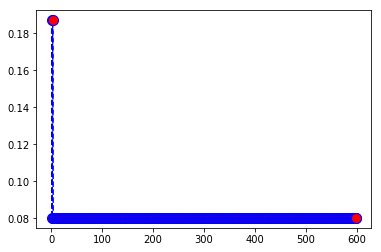

In [20]:
plt.plot(range(1,600),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)


Text(0.5, 1.0, 'Error Rate vs. K Value')

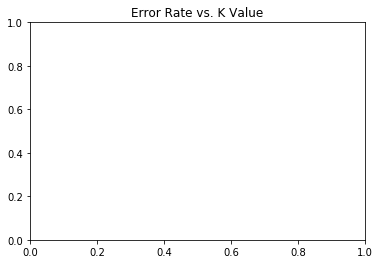

In [21]:
plt.title('Error Rate vs. K Value')


Text(0.5, 0, 'K')

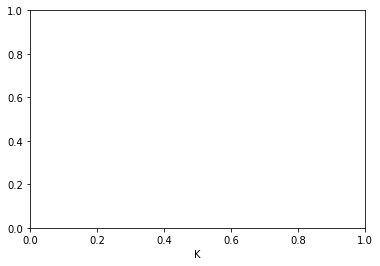

In [22]:
plt.xlabel('K')

Text(0, 0.5, 'Error Rate')

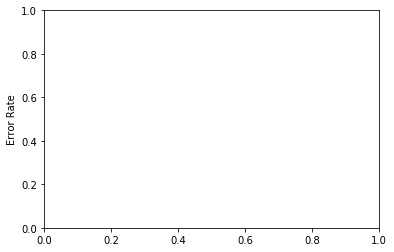

In [23]:
plt.ylabel('Error Rate')


In [24]:
knn = KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [26]:
pred

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [27]:
print('WITH K=1')

WITH K=1


In [28]:
print(confusion_matrix(y_test,pred))

[[383 182]
 [ 21 499]]


In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.68      0.79       565
           1       0.73      0.96      0.83       520

   micro avg       0.81      0.81      0.81      1085
   macro avg       0.84      0.82      0.81      1085
weighted avg       0.84      0.81      0.81      1085



In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.8129032258064516

In [31]:
knn = KNeighborsClassifier(n_neighbors=23)

In [32]:
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [33]:
pred

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [34]:
print('WITH K=23')


WITH K=23


In [35]:
print(confusion_matrix(y_test,pred))

[[522  43]
 [ 44 476]]


In [36]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.92      0.92      0.92       565
           1       0.92      0.92      0.92       520

   micro avg       0.92      0.92      0.92      1085
   macro avg       0.92      0.92      0.92      1085
weighted avg       0.92      0.92      0.92      1085



In [37]:
print(accuracy_score(y_test,pred))

0.919815668202765


In [38]:
print("Error rate is",1- accuracy_score(y_test, pred, normalize = True))

Error rate is 0.08018433179723505


In [42]:
print("sensitivity is", sklearn.metrics.recall_score(y_test, pred,labels=None, average =  'micro', sample_weight=None))

sensitivity is 0.919815668202765
